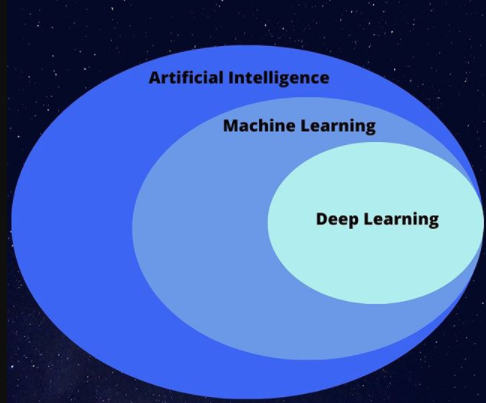

*   Élément de liste
*   Élément de liste




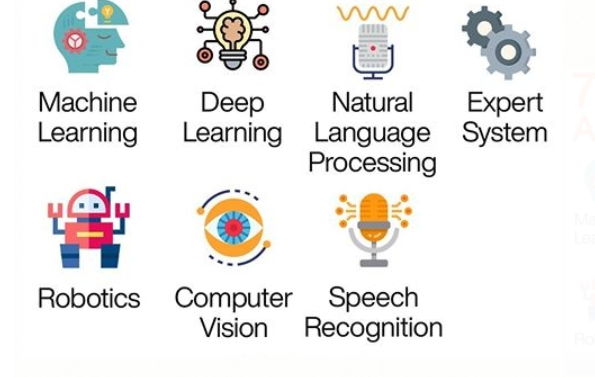

# Introductory CNN Model: MNIST Digits

----------------------------------
Dans cet exemple, nous allons télécharger les chiffres manuscrits du datset MNIST et créer un réseau CNN simple basé sur LeNet-5 pour prédire la catégorie de chiffres (0-9).

Pour commencer, nous chargeons les bibliothèques nécessaires.




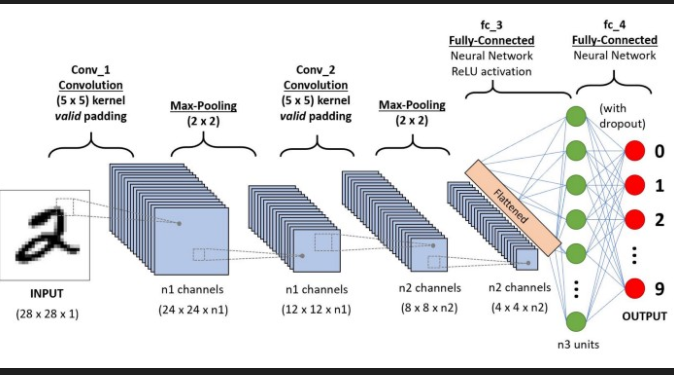

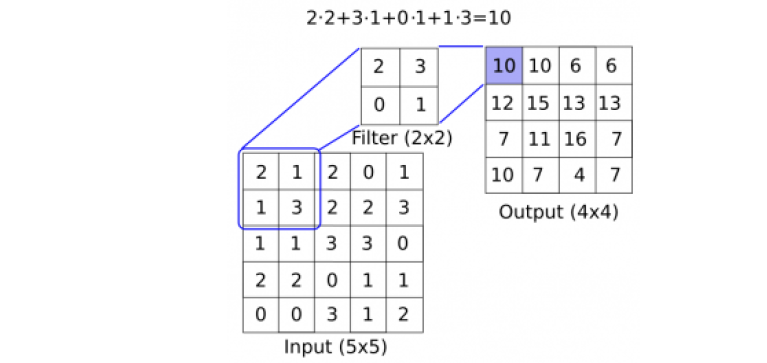


Les differentes etapes pour la realsation d'un modele de reconnaisance des chiffres manuscrites se fontcomme suit.
 1) chargement des données,
2) configurer nos variables de modèle,
3) créer le modèle,
4) entraîner le modèle par lots,
5) puis visualiser les pertes, la précision et quelques chiffres d'échantillon.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

Keras a une méthode intégrée pour charger les ensembles de données MNIST.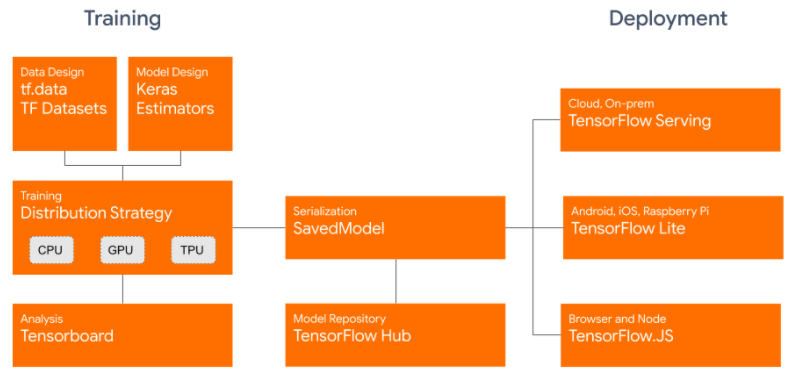

In [2]:
# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

#Padding the images by 2 pixels since in the paper input images were 32x32
x_train = np.pad(x_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
x_test = np.pad(x_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

In [4]:
x_train = x_train / 255
x_test = x_test/ 255

Now, we set the model parameters as follows.

In [5]:
## Set model parameters
image_width = x_train[0].shape[0]
image_height = x_train[0].shape[1]
num_channels = 1 # grayscale = 1 channel

# training and test data variables
batch_size = 100
evaluation_size = 500
epochs = 300
eval_every = 5

# set for reproducible results
seed = 98
np.random.seed(seed)
tf.random.set_seed(seed)

Here we declare our model.

*   Élément de liste
*   Élément de liste


We will have the feature extractor module composed of two convolutional/relu/max pooling layers followed by the classifier with fully connected layers.

In [6]:
input_data = tf.keras.Input(dtype=tf.float32, shape=(image_width,image_height, num_channels), name="INPUT")

# First Conv-ReLU-MaxPool Layer
conv1 = tf.keras.layers.Conv2D(filters=6,
                               kernel_size=5,
                               padding='VALID',
                               activation="relu",
                               name="C1")(input_data)

max_pool1 = tf.keras.layers.MaxPool2D(pool_size=2,
                                      strides=2,
                                      padding='SAME',
                                      name="S1")(conv1)

# Second Conv-ReLU-MaxPool Layer
conv2 = tf.keras.layers.Conv2D(filters=16,
                               kernel_size=5,
                               padding='VALID',
                               strides=1,
                               activation="relu",
                               name="C3")(max_pool1)

max_pool2 = tf.keras.layers.MaxPool2D(pool_size=2,
                                      strides=2,
                                      padding='SAME',
                                      name="S4")(conv2)

# Flatten Layer
flatten = tf.keras.layers.Flatten(name="FLATTEN")(max_pool2)


# First Fully Connected Layer
fully_connected1 = tf.keras.layers.Dense(units=120,
                                         activation="relu",
                                         name="F5")(flatten)

# Second Fully Connected Layer
fully_connected2 = tf.keras.layers.Dense(units=84,
                                         activation="relu",
                                         name="F6")(fully_connected1)

# Final Fully Connected Layer
final_model_output = tf.keras.layers.Dense(units=10,
                                           activation="softmax",
                                           name="OUTPUT"
                                           )(fully_connected2)


model = tf.keras.Model(inputs= input_data, outputs=final_model_output)

ValueError: Exception encountered when calling MaxPooling2D.call().

[1mArgument `padding` must be either 'valid' or 'same'. Received: padding=SAME[0m

Arguments received by MaxPooling2D.call():
  • args=('<KerasTensor shape=(None, 28, 28, 6), dtype=float32, sparse=False, name=keras_tensor>',)
  • kwargs=<class 'inspect._empty'>

We will compile the model with the sparse categorical cross-entropy loss and the ADAM optimizer.

In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           [(None, 32, 32, 1)]       0         
_________________________________________________________________
C1 (Conv2D)                  (None, 28, 28, 6)         156       
_________________________________________________________________
S1 (MaxPooling2D)            (None, 14, 14, 6)         0         
_________________________________________________________________
C3 (Conv2D)                  (None, 10, 10, 16)        2416      
_________________________________________________________________
S4 (MaxPooling2D)            (None, 5, 5, 16)          0         
_________________________________________________________________
FLATTEN (Flatten)            (None, 400)               0         
_________________________________________________________________
F5 (Dense)                   (None, 120)               48120 

Now we can start training!

In [ ]:
# Start training loop
train_loss = []
train_acc = []
test_acc = []
for i in range(epochs):
    rand_index = np.random.choice(len(x_train), size=batch_size)
    rand_x = x_train[rand_index]
    rand_y = y_train[rand_index]

    history_train = model.train_on_batch(rand_x, rand_y)

    if (i+1) % eval_every == 0:
        eval_index = np.random.choice(len(x_test), size=evaluation_size)
        eval_x = x_test[eval_index]
        eval_y = y_test[eval_index]

        history_eval = model.evaluate(eval_x,eval_y)

        # Record and print results
        train_loss.append(history_train[0])
        train_acc.append(history_train[1])
        test_acc.append(history_eval[1])
        acc_and_loss = [(i+1), history_train[0], history_train[1], history_eval[1]]
        acc_and_loss = [np.round(x,2) for x in acc_and_loss]
        print('Epoch # {}. Train Loss: {:.2f}. Train Acc (Test Acc): {:.2f} ({:.2f})'.format(*acc_and_loss))

16/16 [==============================] - 0s 5ms/step - loss: 2.1737 - accuracy: 0.3440
Epoch # 5. Train Loss: 2.19. Train Acc (Test Acc): 0.23 (0.34)
16/16 [==============================] - 0s 3ms/step - loss: 1.9760 - accuracy: 0.5800
Epoch # 10. Train Loss: 2.01. Train Acc (Test Acc): 0.59 (0.58)
16/16 [==============================] - 0s 3ms/step - loss: 1.6054 - accuracy: 0.7300
Epoch # 15. Train Loss: 1.71. Train Acc (Test Acc): 0.74 (0.73)
16/16 [==============================] - 0s 3ms/step - loss: 1.2097 - accuracy: 0.7720
Epoch # 20. Train Loss: 1.32. Train Acc (Test Acc): 0.73 (0.77)
16/16 [==============================] - 0s 3ms/step - loss: 0.8712 - accuracy: 0.8040
Epoch # 25. Train Loss: 0.93. Train Acc (Test Acc): 0.79 (0.80)
16/16 [==============================] - 0s 3ms/step - loss: 0.6756 - accuracy: 0.7980
Epoch # 30. Train Loss: 0.82. Train Acc (Test Acc): 0.76 (0.80)
16/16 [==============================] - 0s 3ms/step - loss: 0.5106 - accuracy: 0.8440
Epoch # 

In [ ]:
history_train[0]

0.11542654782533646

Let's plot the loss and accuracy.

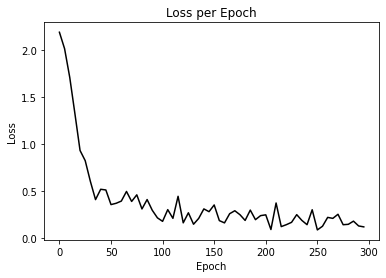

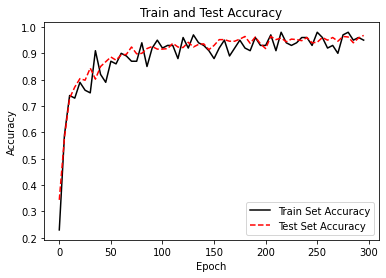

In [ ]:
# Matlotlib code to plot the loss and accuracy
eval_indices = range(0, epochs, eval_every)
# Plot loss over time
plt.plot(eval_indices, train_loss, 'k-')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot train and test accuracy
plt.plot(eval_indices, train_acc, 'k-', label='Train Set Accuracy')
plt.plot(eval_indices, test_acc, 'r--', label='Test Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

Let's see how our model runs on 6 examples.

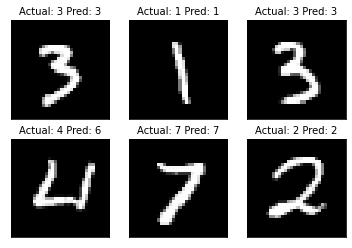

In [ ]:
# Plot some samples and their predictions
actuals = y_test[30:36]
preds = model.predict(x_test[30:36])
predictions = np.argmax(preds,axis=1)
images = np.squeeze(x_test[30:36])

Nrows = 2
Ncols = 3
for i in range(6):
    plt.subplot(Nrows, Ncols, i+1)
    plt.imshow(np.reshape(images[i], [32,32]), cmap='Greys_r')
    plt.title('Actual: ' + str(actuals[i]) + ' Pred: ' + str(predictions[i]),
                               fontsize=10)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

Modèle CNN plus avancé: CIFAR-10
------------------

Dans cet exemple, nous téléchargerons les images CIFAR-10 et créerons un modèle CNN avec dropout.

CIFAR est composé d'images de train 50k et 10k images de test 32x32.

Nous commençons par charger les bibliothèques nécessaires.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

Ensuite, définissez les paramètres par défaut.

Liste des valeurs par défaut:

batch_size: c'est le nombre d'exemples cifar sur lesquels s'entraîner dans un lot.
buffer_size: c'est le nombre d'exemples cifar à mélanger aléatoirement sur un tampon.
epochs: c'est le nombre de passages complets à travers les données d'apprentissage.
crop_height: recadrage interne aléatoire avant l'entraînement sur l'image - hauteur.
crop_width: recadrage interne aléatoire avant l'entraînement sur la largeur de l'image.

In [ ]:
# Set dataset and model parameters
batch_size = 128
buffer_size= 128
epochs=20

#Set transformation parameters
crop_height = 24
crop_width = 24

In [ ]:
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
# Get data
print('Getting/Transforming Data.')
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

Getting/Transforming Data.
170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
# Define CIFAR reader
def read_cifar_files(image, label):

    final_image = tf.image.resize_with_crop_or_pad(image, crop_width, crop_height)
    final_image = image / 255

    # Randomly flip the image horizontally, change the brightness and contrast
    final_image = tf.image.random_flip_left_right(final_image)
    final_image = tf.image.random_brightness(final_image,max_delta=0.1)
    final_image = tf.image.random_contrast(final_image,lower=0.5, upper=0.8)

    return final_image, label


In [ ]:
dataset_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))

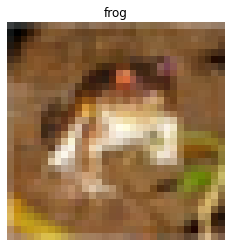

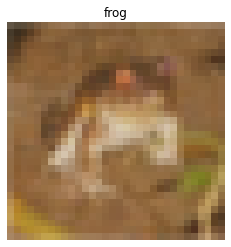

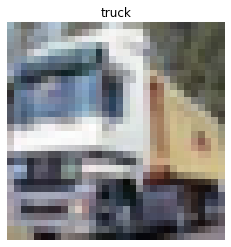

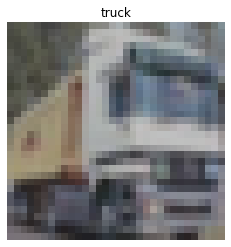

In [ ]:
def show(image, label):
  plt.figure()
  plt.imshow(image)
  plt.title(cifar_classes[label.numpy()[0]])
  plt.axis('off')

for image, label in dataset_train.take(2):
    show(image, label)
    image, label = read_cifar_files(image, label)
    show(image, label)


In [ ]:
dataset_train_processed = dataset_train.shuffle(buffer_size).batch(batch_size).map(read_cifar_files)
dataset_test_processed = dataset_test.batch(batch_size).map(read_cifar_files)

In [ ]:
model = keras.Sequential(
    [# First Conv-ReLU-Conv-ReLU-MaxPool Layer
     tf.keras.layers.Conv2D(input_shape=[32,32,3],
                            filters=32,
                            kernel_size=3,
                            padding='SAME',
                            activation="relu",
                            kernel_initializer='he_uniform',
                            name="C1"),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           padding='SAME',
                           activation="relu",
                           kernel_initializer='he_uniform',
                           name="C2"),
     tf.keras.layers.MaxPool2D((2,2),
                               name="P1"),
     tf.keras.layers.Dropout(0.2),
    # Second Conv-ReLU-Conv-ReLU-MaxPool Layer
     tf.keras.layers.Conv2D(filters=64,
                            kernel_size=3,
                            padding='SAME',
                            activation="relu",
                            kernel_initializer='he_uniform',
                            name="C3"),
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=3,
                           padding='SAME',
                           activation="relu",
                           kernel_initializer='he_uniform',
                           name="C4"),
     tf.keras.layers.MaxPool2D((2,2),
                               name="P2"),
     tf.keras.layers.Dropout(0.2),
    # Third Conv-ReLU-Conv-ReLU-MaxPool Layer
     tf.keras.layers.Conv2D(filters=128,
                            kernel_size=3,
                            padding='SAME',
                            activation="relu",
                            kernel_initializer='he_uniform',
                            name="C5"),
    tf.keras.layers.Conv2D(filters=128,
                           kernel_size=3,
                           padding='SAME',
                           activation="relu",
                           kernel_initializer='he_uniform',
                           name="C6"),
     tf.keras.layers.MaxPool2D((2,2),
                               name="P3"),
     tf.keras.layers.Dropout(0.2),
     # Flatten Layer
     tf.keras.layers.Flatten(name="FLATTEN"),
     # Fully Connected Layer
     tf.keras.layers.Dense(units=128,
                           activation="relu",
                           name="D1"),
    tf.keras.layers.Dropout(0.2),
    # Final Fully Connected Layer
    tf.keras.layers.Dense(units=10,
                          activation="softmax",
                          name="OUTPUT")
    ])

In [ ]:
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
model.compile(
   # optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 32, 32, 32)        896       
_________________________________________________________________
C2 (Conv2D)                  (None, 32, 32, 32)        9248      
_________________________________________________________________
P1 (MaxPooling2D)            (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
C3 (Conv2D)                  (None, 16, 16, 64)        18496     
_________________________________________________________________
C4 (Conv2D)                  (None, 16, 16, 64)        36928     
_________________________________________________________________
P2 (MaxPooling2D)            (None, 8, 8, 64)          0

In [ ]:
history = model.fit(dataset_train_processed,
                    validation_data=dataset_test_processed,
                    epochs=epochs)

Epoch 1/20
391/391 [==============================] - 17s 39ms/step - loss: 1.9801 - accuracy: 0.2804 - val_loss: 1.6691 - val_accuracy: 0.4175
Epoch 2/20
391/391 [==============================] - 15s 38ms/step - loss: 1.4874 - accuracy: 0.4692 - val_loss: 1.2982 - val_accuracy: 0.5394
Epoch 3/20
391/391 [==============================] - 15s 38ms/step - loss: 1.2173 - accuracy: 0.5701 - val_loss: 1.0478 - val_accuracy: 0.6271
Epoch 4/20
391/391 [==============================] - 15s 37ms/step - loss: 1.0430 - accuracy: 0.6337 - val_loss: 0.9481 - val_accuracy: 0.6724
Epoch 5/20
391/391 [==============================] - 15s 38ms/step - loss: 0.9325 - accuracy: 0.6728 - val_loss: 0.9075 - val_accuracy: 0.6915
Epoch 6/20
391/391 [==============================] - 15s 39ms/step - loss: 0.8557 - accuracy: 0.7016 - val_loss: 0.7675 - val_accuracy: 0.7320
Epoch 7/20
391/391 [==============================] - 15s 39ms/step - loss: 0.7964 - accuracy: 0.7247 - val_loss: 1.0949 - val_accuracy:

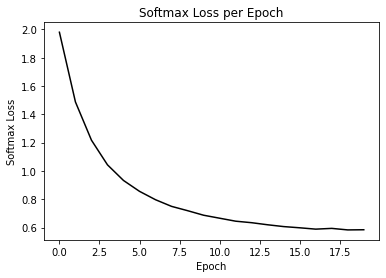

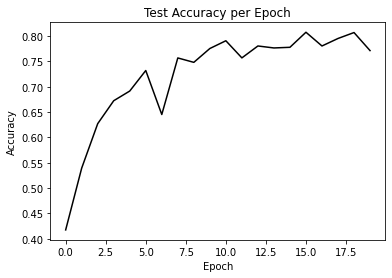

In [ ]:
# Print loss and accuracy
# Matlotlib code to plot the loss and accuracy
epochs_indices = range(0, epochs, 1)

# Plot loss over time
plt.plot(epochs_indices, history.history["loss"], 'k-')
plt.title('Softmax Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Softmax Loss')
plt.show()

# Plot accuracy over time
plt.plot(epochs_indices, history.history["val_accuracy"], 'k-')
plt.title('Test Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()